# Pybullet_envs


Set of robotic environments based on PyBullet physics engine and `gym`.

- [Pybullet Github page](https://github.com/bulletphysics/bullet3)
- [pybullet gym Github page](https://github.com/benelot/pybullet-gym)

in this method, Environments are compatible with `gym` library (not `gymnasium and the list of implemented environments are in this [repo](https://github.com/benelot/pybullet-gym).

> Note that for getting render with floor, we need to remove "Py" from env_id. for example instead of `HumanoidPyBulletEnv-v0`, we need to consider `HumanoidBulletEnv-v0` as env_id.

> an example environment is [`AntBulletEnv-v0`](https://hackmd.io/@jeffreymo/SJJrSJh5_#PyBullet).

## Setup Libraries

In [10]:
# Installing PyBullet using pip should take around 20 seconds, since we use precompiled Linux wheels.
# For more info, check the PyBullet quickstart guide here:
# https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3

%%time
!pip install pybullet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 22.7 ms, sys: 22.1 ms, total: 44.8 ms
Wall time: 2.85 s


In [11]:
%pip install numpngw # for video render

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries

In [20]:
# importing libraries
import numpy as np
import gym
import pybullet_envs

import os
import time
from numpngw import write_apng
from IPython.display import Image

## Create Environment

In [21]:
env_id = "HumanoidBulletEnv-v0" 
# Create the env
env = gym.make(env_id)
env.reset()


# Get the state space and action space
s_size = env.observation_space.shape[0]
a_size = env.action_space

print("_____OBSERVATION SPACE_____ \n")
print("The State Space is: ", s_size)
print("Sample observation", env.observation_space.sample())  # Get a random observation

print("\n _____ACTION SPACE_____ \n")
print("The Action Space is: ", a_size)
print("Action Space Sample", env.action_space.sample())  # Take a random action

_____OBSERVATION SPACE_____ 

The State Space is:  44
Sample observation [ 0.7714448  -0.4235708  -0.5467025   0.03990155 -0.09683953  0.05541461
 -0.23281199  1.4595709   0.06440781  0.62767893 -1.5320401   0.2807881
 -0.00539001  0.02105452 -1.9407544   0.82520485  1.2316825   0.65928376
 -0.34239802 -1.5476665   0.5223072   1.0381843  -0.24882843  2.0006757
 -1.2022736  -0.60498625 -0.313107   -0.13641024 -1.2129687   0.8391499
  0.38527712  0.40358746 -0.15550214  0.38877714 -0.3101489  -0.77788836
  0.9035736   0.01032203  0.08187676  1.3939468  -0.34236094 -1.2077351
  1.9541005  -0.33848563]

 _____ACTION SPACE_____ 

The Action Space is:  Box(-1.0, 1.0, (17,), float32)
Action Space Sample [ 0.3228254   0.5127691  -0.11529469  0.14858334  0.6599978  -0.3895998
 -0.587188    0.34941253  0.7581275   0.250199   -0.5770951   0.48251158
  0.2946752   0.07098969  0.81020766  0.146691    0.05566501]


In [14]:
images = [env.render('rgb_array')]
for _ in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, info = env.step(action)
    images.append(env.render('rgb_array'))

    if terminated:
        observation = env.reset()
        images.append(env.render('rgb_array'))

env.close()

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


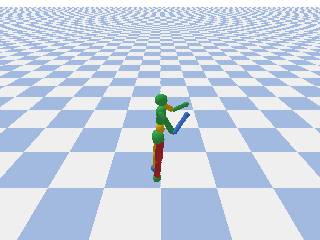

In [15]:
write_apng("anim.png", images, delay=40)  # real-time rendering = 40 ms between frames
Image(filename="anim.png")

# Panda - Gym

Set of robotic environments based on PyBullet physics engine and `gymnasium`, the new version of `gym` library.

- [Documentation](https://panda-gym.readthedocs.io/en/latest/)
- [Github page](https://github.com/qgallouedec/panda-gym)

Environments: 
- PandaReach-v3
- PandaPush-v3
- PandaSlide-v3
- PandaPickAndPlace-v3
- PandaStack-v3
- PandaFlip-v3


## SetUp Libraries

In [16]:
%pip install panda-gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Create Environment

In [17]:
import gymnasium as gym
import panda_gym

env = gym.make("PandaPickAndPlace-v3", render_mode="rgb_array")
observation, info = env.reset()

images = [env.render()]
for _ in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    images.append(env.render())

    if terminated or truncated:
        observation, info = env.reset()
        images.append(env.render())

env.close()

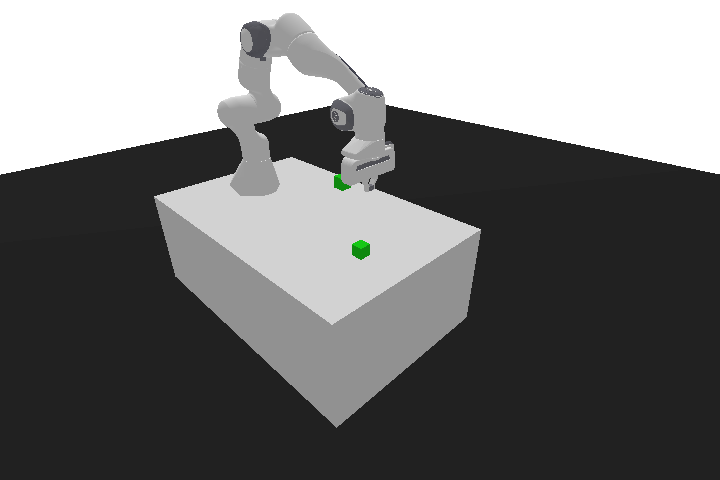

In [18]:
write_apng("anim.png", images, delay=40)  # real-time rendering = 40 ms between frames
Image(filename="anim.png")